<a href="https://colab.research.google.com/github/LEDazzio01/Simplest-Conformal-Prediction/blob/main/simplest-conformal-prediction-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Simplest Conformal Prediction Example (For Learning!)

This notebook demonstrates the **core idea** behind conformal prediction using a minimal example.

## What is Conformal Prediction?
Conformal prediction is a technique that provides **prediction intervals** instead of single-point predictions. These intervals come with a statistical guarantee about how often they contain the true value.

## ⚠️ Important Disclaimer
This example is **only for learning** the core concept. It does **not** follow best practices required for real-world projects:

- We use all data for both training and calibration (no proper train/calibration split)
- This shortcut produces intervals that are **too narrow** (overconfident)

Let's get started!

In [8]:
# --- 1. Import Libraries ---

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Libraries Used

- **`numpy`**: Numerical operations (arrays, quantiles)
- **`matplotlib.pyplot`**: Data visualization
- **`LinearRegression`**: A simple predictive model

In [9]:
# --- 2. Generate Synthetic Data ---

np.random.seed(42)  # For reproducibility

# Create 100 evenly spaced X values from 0 to 10
X = np.linspace(0, 10, 100).reshape(-1, 1)  # Reshape to column vector for sklearn

# Create y values: linear relationship (y = 2x + 1) plus random noise
y = 2 * X.flatten() + 1 + np.random.normal(0, 2, 100)

### About the Data

We created synthetic data with:
- A **linear relationship**: `y = 2x + 1`
- **Random noise**: Gaussian noise with standard deviation of 2

This simulates real-world data where there's an underlying pattern but also some unpredictability.

In [10]:
# --- 3. Train the Model ---

model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model Training

We trained a **linear regression** model, which finds the best-fit straight line through our data by minimizing the squared errors.

In [11]:
# --- 4. Calculate Nonconformity Scores ---

y_pred = model.predict(X)

# Nonconformity scores = absolute prediction errors (residuals)
residuals = np.abs(y - y_pred)

### Nonconformity Scores

This is a **key concept** in conformal prediction!

- **Residual**: The difference between actual and predicted values
- **Absolute residual**: The magnitude of the error (ignoring direction)

These absolute residuals serve as **nonconformity scores**—they measure how "unusual" or "non-conforming" each data point is according to our model.

*Larger scores = the model's prediction was more "wrong" for that point.*

In [12]:
# --- 5. Define a New Data Point ---

X_new = np.array([[5]])  # We want to predict y when x = 5

### New Prediction Point

We want to predict the value of `y` when `x = 5`, **and** provide a prediction interval that quantifies our uncertainty.

In [13]:
# --- 6. Calculate the Prediction Interval ---

# Set confidence level: 90% (alpha = 0.1 means 10% error rate)
alpha = 0.1

# Find the 90th percentile of residuals
quantile_value = np.quantile(residuals, 1 - alpha)

# Make prediction and construct interval
y_new_pred = model.predict(X_new)
y_lower = y_new_pred - quantile_value
y_upper = y_new_pred + quantile_value

print(f"Prediction for X = {X_new[0, 0]}: {y_new_pred[0]:.2f}")
print(f"90% Prediction Interval: [{y_lower[0]:.2f}, {y_upper[0]:.2f}]")

Prediction for X = 5: 10.79
90% Prediction Interval: [7.57, 14.01]


### The Conformal Prediction Process

Here's where the magic happens! Three simple steps:

1. **Choose a confidence level**: We want 90% confidence (`alpha = 0.1`)

2. **Find the quantile**: Using `np.quantile(residuals, 0.9)`, we find the value below which 90% of our errors fall

3. **Construct the interval**: 
   - Lower bound = prediction − quantile
   - Upper bound = prediction + quantile

### Interpretation

> "Based on the model's historical errors, we're 90% confident that the true value falls within this interval."

The interval width reflects the model's uncertainty—wider intervals mean less certainty.

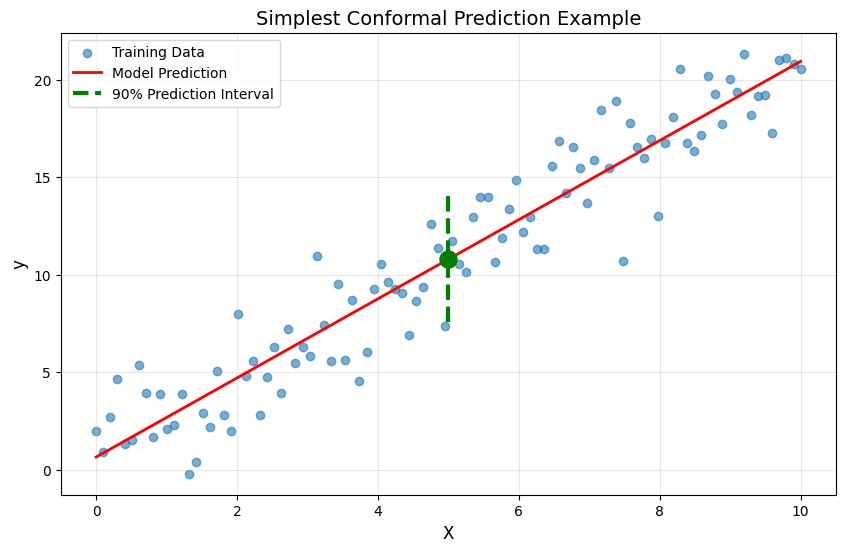

In [14]:
# --- 7. Visualize the Results ---

plt.figure(figsize=(10, 6))

# Plot training data and model
plt.scatter(X, y, alpha=0.6, label="Training Data")
plt.plot(X, y_pred, color='red', linewidth=2, label="Model Prediction")

# Highlight the prediction interval at X_new
plt.plot([X_new[0, 0], X_new[0, 0]], [y_lower[0], y_upper[0]], 
         color='green', linestyle='--', linewidth=3, label="90% Prediction Interval")
plt.scatter(X_new, y_new_pred, color='green', marker='o', s=150, zorder=5)

plt.xlabel("X", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Simplest Conformal Prediction Example", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

### What the Plot Shows

- **Blue dots**: Original training data
- **Red line**: Model's predictions (best-fit line)
- **Green dot**: Prediction for `X = 5`
- **Green dashed line**: 90% prediction interval

The interval provides a **range of plausible values** rather than just a single prediction.

---

## 🔑 Key Takeaways

1. Conformal prediction turns point predictions into **prediction intervals**
2. The interval width depends on historical prediction errors
3. You can control the confidence level (e.g., 90%, 95%)

## ⚠️ Remember: This is Simplified!

For valid prediction intervals in practice, you **must**:
- Split data into **training** and **calibration** sets
- Only compute nonconformity scores on the calibration set
- Never use training data for calibration

This example skips that step to focus on the core concept.